In [9]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [10]:
y = pd.read_csv("AAPL_quarterly_financials.csv")
y

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,\tOtherOperatingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
y.index = y.name
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]
y.index = pd.to_datetime(y.index)
y

,BasicEPS
2023-09-30,1.47
2023-06-30,1.27
2023-03-31,1.53
2022-12-31,1.89
2022-09-30,1.29
...,...
1986-09-30,NaN
1986-06-30,0.002
1986-03-31,0.002
1985-12-31,0.004


In [12]:
y = y.sort_index().fillna(0.)
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [13]:
from pytrends.request import TrendReq

In [84]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Tim Cook", "Apple Events", "Apple Vision Pro", "iOS", "FAANG", "Smart Phone", 
            "Stanford", "UCLA", "Harvard"]  
            
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [85]:
df

,iPhone,Tim Cook,Apple Events,Apple Vision Pro,iOS,FAANG,Smart Phone,Stanford,UCLA,Harvard
date,,,,,,,,,,
2004-01-01,0,0,5,0,1,0,23,93,95,88
2004-02-01,0,2,18,0,1,7,23,92,73,100
2004-03-01,0,3,27,0,1,9,26,100,82,83
2004-04-01,0,1,30,0,1,0,23,87,100,88
2004-05-01,0,2,18,1,2,0,21,87,77,75
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,65,25,54,8,22,54,41,33,38,27
2023-10-01,51,17,42,6,16,50,39,34,44,30
2023-11-01,49,15,29,6,15,50,42,29,44,27


In [86]:
df = df.resample("Q").mean()
df

,iPhone,Tim Cook,Apple Events,Apple Vision Pro,iOS,FAANG,Smart Phone,Stanford,UCLA,Harvard
date,,,,,,,,,,
2004-03-31,0.000000,1.666667,16.666667,0.000000,1.000000,5.333333,24.000000,95.000000,83.333333,90.333333
2004-06-30,0.000000,1.666667,24.666667,0.333333,1.666667,0.000000,23.666667,87.333333,84.000000,80.666667
2004-09-30,0.000000,3.000000,25.333333,0.000000,1.333333,0.000000,25.000000,87.333333,75.000000,77.333333
2004-12-31,0.000000,2.666667,22.000000,0.000000,1.000000,6.333333,27.000000,82.666667,83.000000,83.000000
2005-03-31,0.000000,2.666667,18.666667,0.000000,1.000000,0.000000,27.666667,78.333333,79.333333,80.666667
...,...,...,...,...,...,...,...,...,...,...
2023-03-31,50.000000,14.000000,24.333333,0.000000,14.000000,52.000000,38.333333,28.666667,40.666667,27.333333
2023-06-30,43.666667,21.333333,26.666667,33.333333,14.333333,47.666667,37.000000,28.000000,28.000000,26.666667
2023-09-30,52.000000,14.333333,37.333333,7.666667,16.666667,54.000000,41.000000,28.000000,28.666667,25.000000


In [87]:
X = df
temp = pd.concat([y, X], axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()
temp

,BasicEPS,iPhone,Tim Cook,Apple Events,Apple Vision Pro,iOS,FAANG,Smart Phone,Stanford,UCLA,Harvard
2004-03-31,0.002,0.000000,1.666667,16.666667,0.000000,1.000000,5.333333,24.000000,95.000000,83.333333,90.333333
2004-06-30,0.003,0.000000,1.666667,24.666667,0.333333,1.666667,0.000000,23.666667,87.333333,84.000000,80.666667
2004-09-30,0.0,0.000000,3.000000,25.333333,0.000000,1.333333,0.000000,25.000000,87.333333,75.000000,77.333333
2004-12-31,0.013,0.000000,2.666667,22.000000,0.000000,1.000000,6.333333,27.000000,82.666667,83.000000,83.000000
2005-03-31,0.013,0.000000,2.666667,18.666667,0.000000,1.000000,0.000000,27.666667,78.333333,79.333333,80.666667
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,1.29,52.000000,14.000000,36.333333,0.000000,20.333333,73.333333,39.666667,26.000000,30.666667,24.000000
2022-12-31,1.89,49.333333,18.666667,30.000000,0.000000,16.000000,62.666667,40.666667,28.666667,41.000000,25.000000
2023-03-31,1.53,50.000000,14.000000,24.333333,0.000000,14.000000,52.000000,38.333333,28.666667,40.666667,27.333333
2023-06-30,1.27,43.666667,21.333333,26.666667,33.333333,14.333333,47.666667,37.000000,28.000000,28.000000,26.666667


# 3.) Normalize all the X data

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.82864894e+00, -1.07932966e+00, -1.45287854e+00,
        -1.37228775e-01, -1.15892096e+00, -3.95230753e-01,
        -1.06164777e+00,  3.01126464e+00,  1.91454067e+00,
         3.09304258e+00],
       [-1.82864894e+00, -1.07932966e+00, -4.33767290e-01,
        -4.98007651e-02, -1.09958540e+00, -6.16378018e-01,
        -1.08242828e+00,  2.55205626e+00,  1.95481996e+00,
         2.50124698e+00],
       [-1.82864894e+00, -9.32254124e-01, -3.48841352e-01,
        -1.37228775e-01, -1.12925318e+00, -6.16378018e-01,
        -9.99306209e-01,  2.55205626e+00,  1.41104962e+00,
         2.29717953e+00],
       [-1.82864894e+00, -9.69023009e-01, -7.73471042e-01,
        -1.37228775e-01, -1.15892096e+00, -3.53765641e-01,
        -8.74623097e-01,  2.27253812e+00,  1.89440103e+00,
         2.64409419e+00],
       [-1.82864894e+00, -9.69023009e-01, -1.19810073e+00,
        -1.37228775e-01, -1.15892096e+00, -6.16378018e-01,
        -8.33062059e-01,  2.01298555e+00,  1.67286497e+00,
         2.

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [89]:
import numpy as np
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = .5)
model = lasso.fit(X, y)
model.predict(np.array(X))
model.coef_

C:\Users\Ann Tontiwachw\anaconda3\envs\requirements\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([ 0.00527287,  0.        , -0.        ,  0.        ,  0.        ,
        0.01485846,  0.00277557, -0.        , -0.        , -0.00191792])

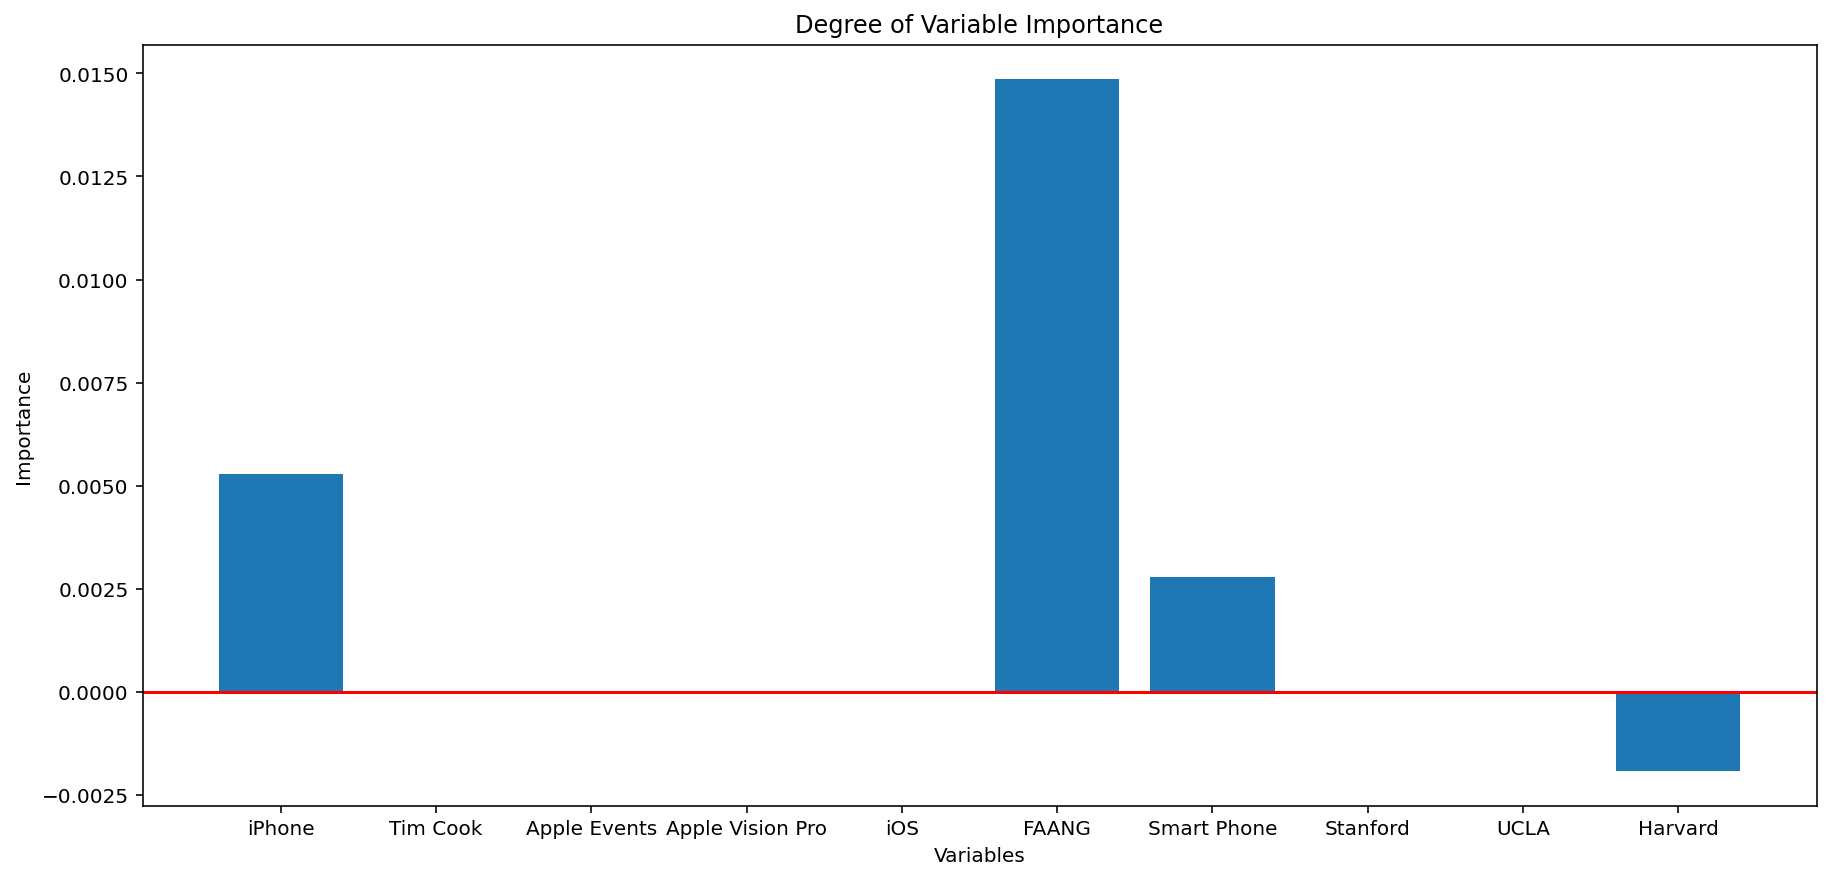

In [94]:
coefficients = lasso.coef_
x_values = range(len(coefficients))

plt.figure(figsize = (15, 7))
plt.bar(x_values, coefficients)
plt.xticks(x_values, X.columns)  
plt.axhline(0, color='red')

plt.title("Degree of Variable Importance")
plt.xlabel("Variables")
plt.ylabel("Importance")

plt.show()
%config InlineBackend.figure_format = 'retina'

# 5.) Do these coefficient magnitudes make sense?

Answer: Probably, yes. But they could be better. The following search items: iPhone, FAANG, and Smart Phone make pretty much sense in nowcasting AAPL earnings. Similarly, searching on educational institution like Harvard is,too, sure not quite related to how much Apple earnings are generated. Browsing over "FAANG" yields the most significant outcome, showing in the highest coefficient magnitude. Lastly, the model could be improved by showing the full-scaled magnitudes of all listed search item.